Kirti Anand: GH1023762

This will be my final Assessment which will be submitted on canvas.

The Data I have used is Bank Marketing Prediction to predict Term Deposit Suscriptions based on few features labels.

Dataset used from Kaggle (June 2014) Bank Marketing prediction
(Accessed: 20-03-2023).

I have imported the below libraries :

1. Pandas for Data.
2. sklearn.preprocessing for Encoding and Building a standardization model.
3. Model selection for grid search.
4. sklearn.metrics for support vector machine.
5. sklearn.decomposition for reducing the dimentionality.
6. imblearn.over_sampling for SMOTE

**Business Problem-**

Predicting subscription of a term deposit by the client.


*   Data Visualization
*   Data preprosessing and feature engineering
*   Data Exploration
*   Modelling
*   Data Normalization
*   Final Model Evaluation
*   Conclusion











**Importing** **Libraries**

In [3]:
import pandas as pd
import sklearn.metrics
import sklearn.preprocessing
import sklearn.svm
import imblearn.over_sampling
import sklearn.preprocessing
import sklearn.decomposition
import numpy as np

**Loading Data:**

**Introduction -**

The Data bank.csv has in total of 11163 rows and 17 coloums.

Input Variables used:

1. age 
2. job 
3. marital
4. education
5. default
6. balance
7. housing
8. loan
9. contact

Target Label:

Deposit



I have read the data and added it to a variable df(data frame).

Using sample data 5000 for the prediction.

Used data head to check the data is properly loaded.


In [4]:
df_bank_data = pd.read_csv('Deposit.csv')
df_bank_data = df_bank_data.sample(5000)
df_bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8081,25,services,single,secondary,no,895,yes,no,unknown,3,jun,167,1,-1,0,unknown,no
5016,54,self-employed,single,tertiary,no,384,no,yes,cellular,27,may,200,1,-1,0,unknown,yes
2311,40,self-employed,single,tertiary,no,10346,no,no,cellular,15,jun,491,2,207,1,other,yes
10528,60,blue-collar,married,primary,no,4903,no,yes,unknown,9,jun,290,1,-1,0,unknown,no
889,32,admin.,married,secondary,no,8749,yes,yes,unknown,21,oct,294,1,-1,0,unknown,yes


**Data Visualization -**

Noticing the absence of data or inconsistency in any variable and giving necessary changes.

**Using info() method to print information about the DataFrame.**

In [5]:
df_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 8081 to 7849
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5000 non-null   int64 
 1   job        5000 non-null   object
 2   marital    5000 non-null   object
 3   education  5000 non-null   object
 4   default    5000 non-null   object
 5   balance    5000 non-null   int64 
 6   housing    5000 non-null   object
 7   loan       5000 non-null   object
 8   contact    5000 non-null   object
 9   day        5000 non-null   int64 
 10  month      5000 non-null   object
 11  duration   5000 non-null   int64 
 12  campaign   5000 non-null   int64 
 13  pdays      5000 non-null   int64 
 14  previous   5000 non-null   int64 
 15  poutcome   5000 non-null   object
 16  deposit    5000 non-null   object
dtypes: int64(7), object(10)
memory usage: 703.1+ KB


**Converting 'age' feature label into integer.**

Since age column cannot be a negative value which should also be examined.

In [6]:
df_bank_data.age = df_bank_data.age.astype(int)

**Printing all numeric columns**

In [7]:
df_bank_data.select_dtypes(include='number') 

,age,balance,day,duration,campaign,pdays,previous
8081,25,895,3,167,1,-1,0
5016,54,384,27,200,1,-1,0
2311,40,10346,15,491,2,207,1
10528,60,4903,9,290,1,-1,0
889,32,8749,21,294,1,-1,0
...,...,...,...,...,...,...,...
8553,59,1376,9,61,4,-1,0
7165,53,592,13,151,1,-1,0
875,36,2473,28,965,4,-1,0
8216,36,3343,18,307,1,-1,0


**Data preprosessing and feature engineering:**

Selecting and Manipulating the raw data into features.

Initially, Splitting data in 2 sets which is df train and df test to avoid data leakage. To make sure that the final model works as predicted, test and training data are seperated.

Train Data - The model will be trained with the training set and learn from the data and parameters.

Test Data - The model will be used to test the final model and evaluate the final algorithm.

In [8]:
from sklearn.model_selection import train_test_split 
bank_train, bank_test = train_test_split(df_bank_data)

print("Size of Training Dataset:" , bank_train.shape)
print("Size of Testing Dataset:" , bank_test.shape)

Size of Training Dataset: (3750, 17)
Size of Testing Dataset: (1250, 17)


**Checking the number of null values present in the training set.**

In [9]:
bank_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Data Exploration**

Checking if the train set has unique values for each column by using For loop

I have observed the explicit values which is 'unknown' in the columns - 'job', 'education', 'contact', 'poutcome'





In [10]:
for n in bank_train.columns:
    print(n)
    print(n, "(", len(bank_train[n].unique()) , "values):\n", np.sort(bank_train[n].unique()))

age
age ( 71 values):
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89]
job
job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital
marital ( 3 values):
 ['divorced' 'married' 'single']
education
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default
default ( 2 values):
 ['no' 'yes']
balance
balance ( 2048 values):
 [-6847 -2282 -2049 ... 25290 25947 27696]
housing
housing ( 2 values):
 ['no' 'yes']
loan
loan ( 2 values):
 ['no' 'yes']
contact
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
day
day ( 31 values):
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
month
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' '

**Droping the values of Job Occupations and Education that are "Unknown"**

In [11]:
df_bank_data = df_bank_data.drop(df_bank_data.loc[df_bank_data["job"] == "unknown"].index)
df_bank_data = df_bank_data.drop(df_bank_data.loc[df_bank_data["education"] == "unknown"].index)

**For a better classification of these data, the unknown data will be converted into 'NaN' format and will be treated as missing data.**

In [12]:
bank_train['contact'] = bank_train['contact'].replace('unknown',np.NaN)
bank_train['poutcome'] = bank_train['poutcome'].replace({'unknown':np.NaN, 'other':np.NaN})

**Counting the number of records for every combination of unique values for every column.**

In [13]:
print(bank_train.value_counts()) 

age  job         marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  deposit
18   student     single    primary    no       608      no       no    cellular   13   nov    210       1         93     1         success   yes        1
46   admin.      married   unknown    no       5511     no       no    cellular   26   jul    414       2         389    1         success   yes        1
45   management  married   tertiary   no       4119     yes      yes   telephone  31   aug    473       2         283    1         success   yes        1
                           unknown    no       2724     no       no    cellular   28   jun    359       2         182    1         success   yes        1
     services    divorced  secondary  no       0        yes      yes   cellular   21   nov    173       1         192    1         failure   no         1
                                                                                 

**Splitting Data**

Splitting the data into 2 part which is training and test set to fit the data and evaluate a learning model. Used train_test_split() function from scikit-learn where 80 percent of the sample data is used for training and 20 percent is used for testing.

Splitting the Target Label and Features - By droping rows

To monitor accuracy in the validation set and avoid overfitting.

In [14]:
training_x = bank_train.drop(["deposit"], axis=1)   
training_y = bank_train["deposit"]

testing_x = bank_test.drop(["deposit"], axis=1)   
testing_y = bank_test["deposit"]

print(" Training x dataset: ", training_x.shape)
print(" Training y dataset: ", training_y.shape)
print(" Testing x dataset:", testing_x.shape)
print(" Testing y dataset: ", testing_y.shape)

 Training x dataset:  (3750, 16)
 Training y dataset:  (3750,)
 Testing x dataset: (1250, 16)
 Testing y dataset:  (1250,)


**Modelling**

**Enconding features using OneHotEncoder**

In total the data has 10 categorical variables.

After analyzing the data, it is noted that the variables 'job', 'marital', 'education' and 'month' have more than two categories.

The other variables will be converted into binary format of 0 and 1.

First, we encode the target variable. We note that the target column presents just two possible values: 'yes' or 'no'. Since these binary values appears in more columns, we encode all the 'yes' and 'no' in the whole dataframe with 0 and 1.

In [15]:
from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder(handle_unknown='ignore')
encode.fit(training_x)

training_x = encode.transform(training_x)

testing_x = encode.transform(testing_x)

print("Shape of Training x :", training_x.shape)
print("Shape of Testing x :", testing_x.shape)

Shape of Training x : (3750, 3606)
Shape of Testing x : (1250, 3606)


As the missing data has been transformed into a new category it is necessary to transform it into 'NaN' format again

Replaced the category with NaN values again in the following steps

In [16]:
bank_train['poutcome'] = bank_train['poutcome'].replace(2,np.NaN)
bank_train['contact'] = bank_train['contact'].replace(2,np.NaN)

**Data** **Normalization**

**Data scaling**

Data scaling is process on training features to reduce the number of test feature. 
Used a class from the Scikit-learn library.

In [17]:
scaling = sklearn.preprocessing.StandardScaler(with_std=False, with_mean=False)
scaling.fit(training_x)

training_x = scaling. transform(training_x)

testing_x = scaling. transform(testing_x)
print("Shape of Training x:", training_x.shape) 
print("Shape of Testing x:", testing_x.shape) 

Shape of Training x: (3750, 3606)
Shape of Testing x: (1250, 3606)


**Oversampling using SMOTE**

Synthetic Minority Oversampling Technique.
Using SMOTE to creates a new sample to handle imbalanced classes.

In [18]:
smote = imblearn.over_sampling.SMOTE(random_state=42)

training_x_resampled, training_y_resampled = smote.fit_resample(training_x, training_y)
training_y.value_counts()

print("Resampled size of Training x:", training_x_resampled.shape)
print("Resampled size of Training y:", training_y_resampled.shape)

Resampled size of Training x: (3962, 3606)
Resampled size of Training y: (3962,)


**Reducing the dimensionality** - Using sklearn.decomposition.PCA


*   To Reduce number of training and testing features



In [19]:
pca_dim = sklearn.decomposition.PCA(n_components=150)
pca_dim.fit(training_x_resampled.toarray())

training_x_resampled_pca_dim = pca_dim.transform(training_x_resampled.toarray())

testing_x_pca_dim = pca_dim.transform(testing_x.toarray())

print("Shape of Resampled Training x:", training_x_resampled_pca_dim.shape)
print("Shape of Resampled Testing x:", testing_x_pca_dim.shape)

Shape of Resampled Training x: (3962, 150)
Shape of Resampled Testing x: (1250, 150)


**Model Selection**

Four different classification algorithms are created for classification

1. Support Vector Machines
2. K-Nearest Neighbors 
3. Logistic Regression



**Support Vector Machine Model**

Kernel, C, gamma and degree hyperparameters are used in the SVM algorithm which will generate the best parameters and best score for the model obtained from GridSearchCV.

In [20]:
from sklearn import svm, datasets 
from sklearn.svm import SVC 

param_svc = {'C':[0.1,0.3,1,3,5], 'kernel':('poly','linear', 'rbf'), 'gamma':('scale', 'auto'), 'degree':[1,2,3]}
svc = sklearn.svm.SVC()

clasify_svc = sklearn.model_selection.GridSearchCV(svc, param_svc, n_jobs=-1, cv=5, scoring="accuracy")
clasify_svc.fit(training_x, training_y)

print("Accuracy through SVM model = {}".format(clasify_svc.best_score_*100))
print("Best parameter = {}".format(clasify_svc.best_params_))

Accuracy through SVM model = 73.94666666666667
Best parameter = {'C': 5, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}


**k-nearest neighbor model**

_neighors and leaf_size hyperparameters are used in the k-nearest neighbor algorithm which will generate the best parameters and best score for the model obtained from GridSearchCV.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)

param_knn = {
    "_neighbors": range(1, 30, 2),
    "leaf_size": range (1, 50, 5)
}

from sklearn.model_selection import GridSearchCV
clasify_knn = GridSearchCV(estimator = SVC(), param_grid = {'C': [1, 10], 'kernel': ('linear', 'rbf')})
clasify_knn.fit(training_x, training_y)

print("Accuracy through KNN model = {}".format(clasify_svc.best_score_*100))
print("Best parameter = {}".format(clasify_svc.best_params_))

Accuracy through KNN model = 73.94666666666667
Best parameter = {'C': 5, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}


**Logistic Regression**

C, multi_class and solver hyperparameters are used in the Logistic Regression algorithm which will generate the best parameters and best score for the model obtained from GridSearchCV.

In [22]:
param_Lr = {
    'C':[0.1,0.2,0.3,0.4,0.5], 'multi_class':('auto', 'ovr'),'solver':('newton-cg', 'liblinear', 'lbfgs', 'sag', 'newton-cholesky', 'saga')
    }
Lr = sklearn.linear_model.LogisticRegression(max_iter=50, random_state=0)
clasify_Lr = sklearn.model_selection.GridSearchCV(Lr, param_Lr, cv=5, scoring="accuracy", n_jobs=-1)
clasify_Lr.fit(training_x_resampled_pca_dim,training_y_resampled)

print("Accuracy through Logistic model = {}".format(clasify_Lr.best_score_*100))
print("Best parameter = {}".format(clasify_Lr.best_params_))

Accuracy through Logistic model = 70.82218783038455
Best parameter = {'C': 0.1, 'multi_class': 'auto', 'solver': 'newton-cg'}


After adjusting the parameters of all four models and testing them on the Training and Test Set data, it is found that Logistic Regression had the largest difference in accuracy from train and test, which was the highest overfit among the 3 models.

For Support Vector Machines and k-nearest neighbor, the accuracy obtained from train and test is very similar. Therefore, it will be used classification_report in next step check

**Classification Report** - 

To build a text report showing classification metrics.

In [23]:
predicting_svc = clasify_svc.predict(testing_x)
predicting_knn = clasify_knn.predict(testing_x)

from sklearn.metrics import classification_report

print('Classification Report generated for Support Vector Machines')
print(classification_report(testing_y, predicting_svc))
print('Classification Report for k-nearest neighbor')
print(classification_report(testing_y, predicting_svc))

Classification Report generated for Support Vector Machines
              precision    recall  f1-score   support

          no       0.80      0.70      0.75       644
         yes       0.72      0.82      0.77       606

    accuracy                           0.76      1250
   macro avg       0.76      0.76      0.76      1250
weighted avg       0.76      0.76      0.76      1250

Classification Report for k-nearest neighbor
              precision    recall  f1-score   support

          no       0.80      0.70      0.75       644
         yes       0.72      0.82      0.77       606

    accuracy                           0.76      1250
   macro avg       0.76      0.76      0.76      1250
weighted avg       0.76      0.76      0.76      1250



By analysing **Precision** and **Recall** all instance are predicted as no subscription.
In this case, the generated report display those Support Vector Machines and k-nearest neighbor has similar precision and recall.

**Final Model Evaluation**

The best model and hyperparameters I consider is Support vector machine for the data.

In [24]:
y_predected_final = clasify_svc.predict(testing_x)
Accuracy = sklearn.metrics.accuracy_score(y_predected_final, testing_y)
print(f'Accuracy of final model through SVM using test dataset is: ',Accuracy*100,"%," ,"\n","with best parameters = {'C': 3, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}")


Accuracy of final model through SVM using test dataset is:  75.76 %, 
 with best parameters = {'C': 3, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


**Conclusion**

After observing the results of the successfully built models, Support vector machine model is the one that obtained the best result. With this model, bank will now be able to predict a customer's response to its marketing campaign before reaching out to their customers. Using this model, bank will able to allocate more marketing strategies towards the clients who are classified as more likely to accept term deposits subscription. However the model will help to increases conversion rate and sales volume.

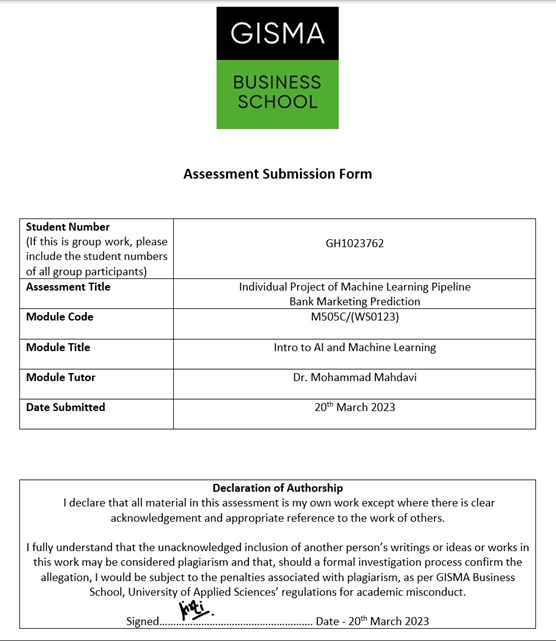

In [25]:
!jupyter nbconvert --to html Bank_Marketing.ipynb

[NbConvertApp] Converting notebook Bank_Marketing.ipynb to html
[NbConvertApp] Writing 756487 bytes to Bank_Marketing.html
